In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
y_train.shape

(60000,)

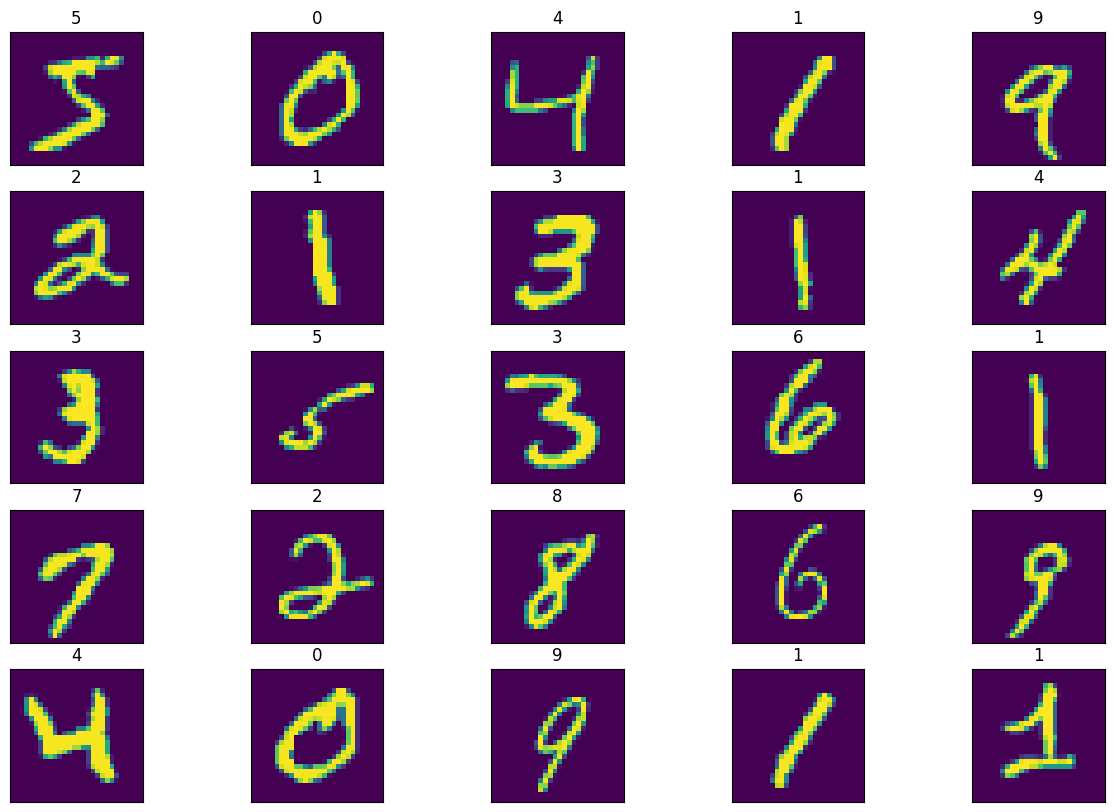

In [5]:
plt.figure(figsize=(15,10))

for i in range(25):

  row = 5
  plt.subplot(row, 25//row, i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])

## Scale the data

In [6]:
X_train = X_train/255
X_test = X_test / 255

### Reshaping the data to feed into ANN network

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0].size

784

In [9]:
size = X_train[0].size

In [10]:
X_train = X_train.reshape(60000, size)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_test = X_test.reshape(10000, size)

In [13]:
X_test.shape

(10000, 784)

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train.shape

(60000, 10)

## Build Model

In [16]:
model = Sequential()

model.add(Dense(size, input_shape = (size, ), activation = 'relu'))

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

## Compiling the model

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Train the model

In [18]:
history = model.fit(X_train, y_train,
                    validation_data = [X_test, y_test],
                    epochs = 10,
                    batch_size = 10,
                    verbose = 1)

Epoch 1/10
6000/6000 [==============================] - 22s 3ms/step - loss: 0.1832 - accuracy: 0.9438 - val_loss: 0.1203 - val_accuracy: 0.9634
Epoch 2/10
6000/6000 [==============================] - 21s 3ms/step - loss: 0.0877 - accuracy: 0.9731 - val_loss: 0.0844 - val_accuracy: 0.9756
Epoch 3/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0641 - accuracy: 0.9812 - val_loss: 0.0817 - val_accuracy: 0.9753
Epoch 4/10
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0824 - val_accuracy: 0.9762
Epoch 5/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.1012 - val_accuracy: 0.9766
Epoch 6/10
6000/6000 [==============================] - 21s 3ms/step - loss: 0.0399 - accuracy: 0.9885 - val_loss: 0.0966 - val_accuracy: 0.9796
Epoch 7/10
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0973 - val_ac

In [50]:
img  = X_test[512]

In [51]:
img.shape

(784,)

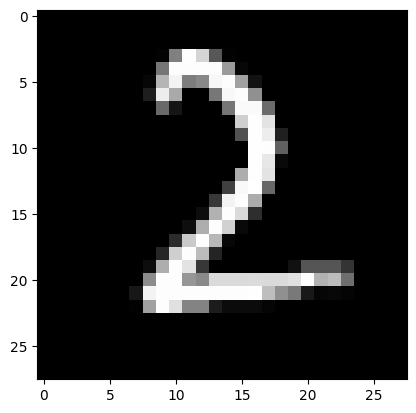

In [52]:
plt.imshow(img.reshape(28,28), cmap = 'gray')

In [53]:
np.argmax(model.predict(img.reshape(1,-1)))

1/1 [==============================] - 0s 18ms/step


2